In [1]:
import tensorflow as tf
import numpy as np
import os
import distutils
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# add empty color dimension and scale to [0,1]
x_train = np.expand_dims(x_train, -1)/255
x_test = np.expand_dims(x_test, -1)/255

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from keras.models import Model
from keras.optimizers import Adam, SGD
import numpy as np
import matplotlib.pyplot as plt
import os
import distutils

def cnn_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(64, name="flat"))
  model.add(tf.keras.layers.Activation('relu', name="flat_relu"))
  model.add(tf.keras.layers.Dense(10, name="logits"))
  model.add(tf.keras.layers.Activation('softmax'))
  return model


In [ ]:
model = cnn_model()
loss, val_loss, accuracy, val_accuracy = [],[],[],[]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
activation (Activation)      (None, 2304)              0         
_________________________________________________________________
flat (Dense)                 (None, 64)                1

In [ ]:
lr = 1e-3
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
batch_size = 500
epochs = 10

history = model.fit(
    x_train.astype(np.float32), y_train.astype(np.float32),
    initial_epoch = len(loss),
    epochs =  epochs + len(loss), 
    validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)),
    batch_size=batch_size, 
    verbose = 1,
)

loss = loss + history.history['loss']
val_loss = val_loss + history.history['val_loss']
accuracy = accuracy + history.history['accuracy']
val_accuracy = val_accuracy + history.history['val_accuracy']

print('Lowest training loss = {:9.6f}, in epoch {} '.format(np.amin(loss),np.argmin(loss)+1))
print('Lowest validation loss = {:9.6f}, in epoch {} '.format(np.amin(val_loss),np.argmin(val_loss)+1))
print('Highest training accuracy = {:9.6f}, in epoch {} '.format(np.amax(accuracy),np.argmax(accuracy)+1))
print('Highest validation accuracy = {:9.6f}, in epoch {} '.format(np.amax(val_accuracy),np.argmax(val_accuracy)+1))

model.save_weights('last_model.h5', overwrite=True)


Epoch 1/10
120/120 [==============================] - 34s 13ms/step - loss: 0.9450 - accuracy: 0.7459 - val_loss: 0.1168 - val_accuracy: 0.9652
Epoch 2/10
120/120 [==============================] - 1s 11ms/step - loss: 0.1056 - accuracy: 0.9686 - val_loss: 0.0685 - val_accuracy: 0.9789
Epoch 3/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0508 - val_accuracy: 0.9836
Epoch 4/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0490 - accuracy: 0.9849 - val_loss: 0.0417 - val_accuracy: 0.9866
Epoch 5/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0453 - val_accuracy: 0.9860
Epoch 6/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.0354 - val_accuracy: 0.9879
Epoch 7/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0330 - val_accuracy: 0.988

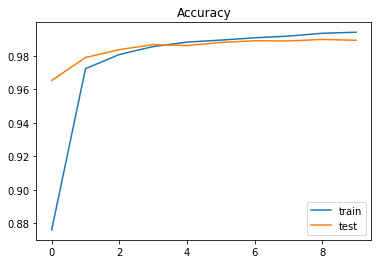

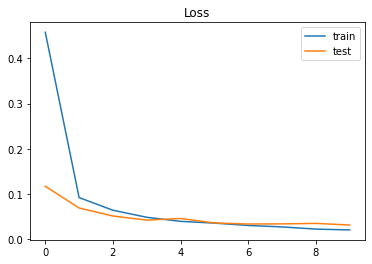

In [ ]:
fig, ax = plt.subplots()
ax.plot(accuracy,label = 'train')
ax.plot(val_accuracy,label = 'test')
ax.set_title('Accuracy')
ax.legend(loc='lower right')
fig, ax = plt.subplots()
ax.plot(loss,label = 'train')
ax.plot(val_loss,label = 'test')
ax.set_title('Loss')
ax.legend(loc='upper right')